In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import danych, tylko dla Genewy

In [2]:
df_raw = pd.read_csv('http://data.insideairbnb.com/switzerland/geneva/geneva/2023-09-23/data/listings.csv.gz')

## Wizualizacja danych przy użyciu sweetviz

In [3]:
!pip install sweetviz -qq
!echo '[Layout]' > Override.ini
!echo 'show_logo = 0' >> Override.ini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 14.2 MB/s eta 0:00:00


In [4]:
import sweetviz as sv
sv.config_parser.read("Override.ini")
my_report = sv.analyze(df_raw)
my_report.show_html(filepath='Basic_report.html', layout='vertical', scale=None)
my_report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

### Próbka surowych danych

In [5]:
pd.set_option('display.max_columns', None)
df_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515,https://www.airbnb.com/rooms/42515,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,<b>The space</b><br />This is a private room w...,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,Noelle,2010-07-30,"Geneva, Switzerland","Hi, I am a Management consultant professional,...",within a few hours,100%,40%,f,https://a0.muscache.com/im/users/185647/profil...,https://a0.muscache.com/im/users/185647/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Commune de Genève,NaN,46.20198,6.15672,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dryer"", ""Kitchen"", ""TV with standard cable"",...",$89.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,28,58,88,363,2023-09-23,73,6,0,2011-09-24,2023-07-21,4.73,4.71,4.77,4.84,4.83,4.84,4.51,NaN,f,1,0,1,0,0.50
1,107438,https://www.airbnb.com/rooms/107438,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,<b>The space</b><br />Version Française et Ang...,NaN,https://a0.muscache.com/pictures/93bb00cc-03bb...,556499,https://www.airbnb.com/users/show/556499,F. M.,2011-05-04,"Geneva, Switzerland",It is a cosy furnished room with wifi connexio...,a few days or more,20%,13%,f,https://a0.muscache.com/im/users/556499/profil...,https://a0.muscache.com/im/users/556499/profil...,Passy,2,5,"['email', 'phone']",t,t,NaN,Commune de Genève,NaN,46.18905,6.16154,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dishwasher"", ""Wine glasses"", ""Essentials"", ""...",$60.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,9,39,69,344,2023-09-23,27,0,0,2011-05-15,2019-11-30,4.87,4.90,4.76,4.76,4.76,4.57,4.57,NaN,f,1,0,1,0,0.18
2,203997,https://www.airbnb.com/rooms/203997,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,"Spacious studio with washer/dryer, Wi-fi, supe...",This is the most sought after area in Geneva: ...,https://a0.muscache.com/pictures/14163740/9392...,1001280,https://www.airbnb.com/users/show/1001280,Mike,2011-08-21,"Geneva, Switzerland","I love airbnb, both for hosting and traveling....",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/3bbea...,https://a0.muscache.com/im/pictures/user/3bbea...,NaN,6,12,"['email', 'phone']",t,t,"Geneva, Switzerland",Commune de Genève,NaN,46.19964,6.15580,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Free dryer \u2013 ...",$165.00,5,730,5,5,1125,1125,5.0,1125.0,NaN,t,6,6,28,28,2023-09-23,81,7,0,2012-11-11,2023-07-23,4.90,4.98,4.90,4.98,4.99,4.95,4.83,NaN,t,2,2,0,0,0.61
3,276025,https://www.airbnb.com/rooms/2760

### Weryfikacja typów

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2458 non-null   int64  
 1   listing_url                                   2458 non-null   object 
 2   scrape_id                                     2458 non-null   int64  
 3   last_scraped                                  2458 non-null   object 
 4   source                                        2458 non-null   object 
 5   name                                          2458 non-null   object 
 6   description                                   2397 non-null   object 
 7   neighborhood_overview                         1185 non-null   object 
 8   picture_url                                   2458 non-null   object 
 9   host_id                                       2458 non-null   i

### Podsumowanie zmiennych numerycznych


In [7]:
import pandas as pd
from IPython.display import HTML

numerical_columns = [
    'accommodates',
    'bedrooms',
    'beds',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

summary_table = df_raw[numerical_columns].describe().transpose()
summary_table['Liczba danych brakujących'] = df_raw[numerical_columns].isnull().sum()

summary_table_html = summary_table.to_html()

HTML(summary_table_html)

,count,mean,std,min,25%,50%,75%,max,Liczba danych brakujących
accommodates,2458.0,2.683483,1.547478,1.00,2.00,2.00,4.00,16.00,0
bedrooms,1616.0,1.459777,0.830303,1.00,1.00,1.00,2.00,9.00,842
beds,2423.0,1.601733,1.064919,1.00,1.00,1.00,2.00,16.00,35
minimum_nights_avg_ntm,2458.0,7.749959,41.233700,1.00,1.00,2.00,5.00,1100.00,0
maximum_nights_avg_ntm,2458.0,647.899837,476.773602,1.00,120.00,365.00,1125.00,1200.00,0
number_of_reviews,2458.0,25.951993,54.762091,0.00,1.00,7.00,27.00,718.00,0
number_of_reviews_ltm,2458.0,7.615134,14.750370,0.00,0.00,2.00,8.00,156.00,0
number_of_reviews_l30d,2458.0,0.700570,1.532662,0.00,0.00,0.00,1.00,13.00,0
review_scores_rating,2011.0,4.684585,0.537593,0.00,4.59,4.83,5.00,5.00,447
review_scores_accuracy,2003.0,4.747713,0.419357,1.00,4.67,4.87,5.00,5.00,455


### Podsumowanie zmiennych kategorycznych

In [8]:
categorical_columns = [
    'host_response_time',
    'host_is_superhost',
    'room_type',
    'has_availability',
    'instant_bookable',
]

categorical_summary = []

for column in categorical_columns:
    column_data = df_raw[column]
    unique_values = column_data.unique()
    unique_count = len(unique_values)
    most_common_value = column_data.mode().values[0]
    most_common_value_count = column_data.value_counts().max()
    missing_values_count = column_data.isnull().sum()

    categorical_summary.append({
        'Zmienna kategoryczna': column,
        'Liczba kategorii': unique_count,
        'Najczęściej występująca wartość': most_common_value,
        'Liczność najczęściej występującej wartości': most_common_value_count,
        'Liczba wartości unikalnych': unique_count,
        'Liczba braków danych': missing_values_count
    })

categorical_summary_df = pd.DataFrame(categorical_summary)

HTML(categorical_summary_df.to_html())

,Zmienna kategoryczna,Liczba kategorii,Najczęściej występująca wartość,Liczność najczęściej występującej wartości,Liczba wartości unikalnych,Liczba braków danych
0,host_response_time,5,within an hour,1023,5,534
1,host_is_superhost,3,f,1977,3,7
2,room_type,4,Entire home/apt,1698,4,0
3,has_availability,2,t,2393,2,0
4,instant_bookable,2,f,1923,2,0


### Sprawdzenie braków danych w zbiorze

In [9]:
missing_data_summary = df_raw.isnull().sum()

missing_data_summary_df = pd.DataFrame({
    'Zmienna': missing_data_summary.index,
    'Liczba brakujących danych': missing_data_summary.values,
    'Procent brakujących danych': (missing_data_summary.values / len(df_raw)) * 100
})

HTML(missing_data_summary_df.to_html())

,Zmienna,Liczba brakujących danych,Procent brakujących danych
0,id,0,0.000000
1,listing_url,0,0.000000
2,scrape_id,0,0.000000
3,last_scraped,0,0.000000
4,source,0,0.000000
5,name,0,0.000000
6,description,61,2.481692
7,neighborhood_overview,1273,51.790073
8,picture_url,0,0.000000
9,host_id,0,0.000000


### Wizualizacja rozkladu zmiennych

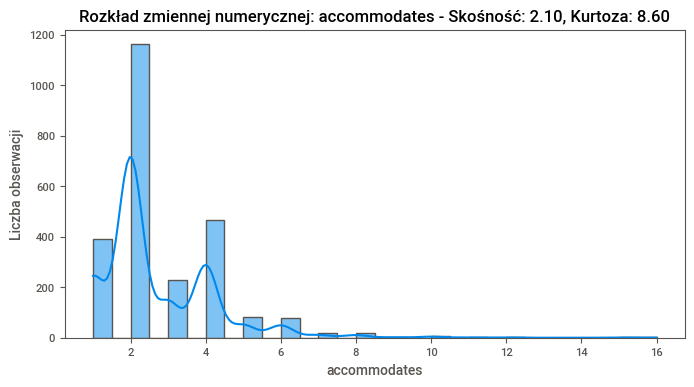

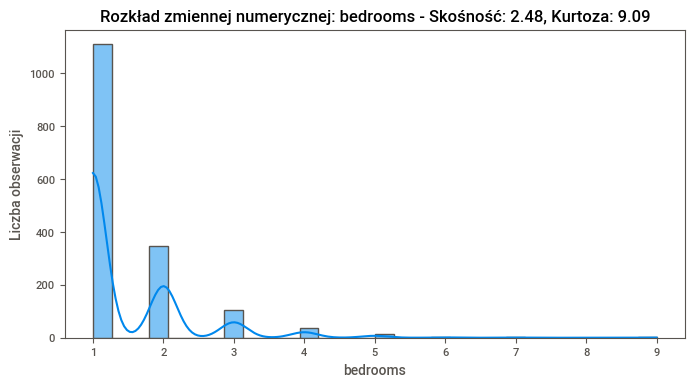

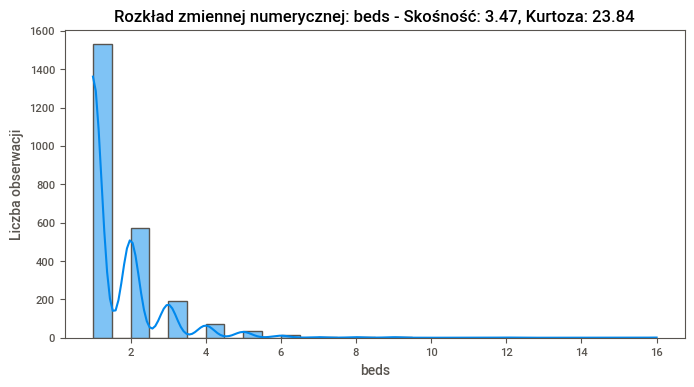

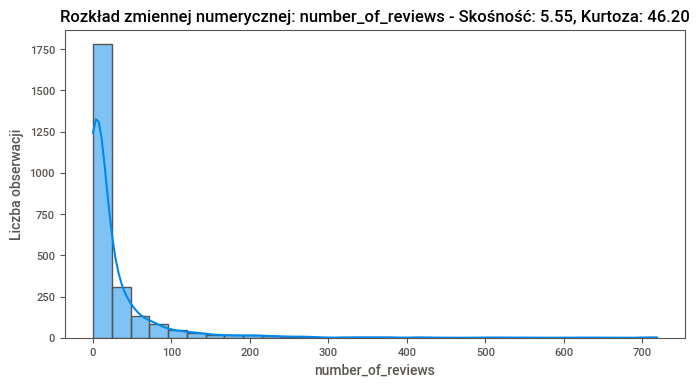

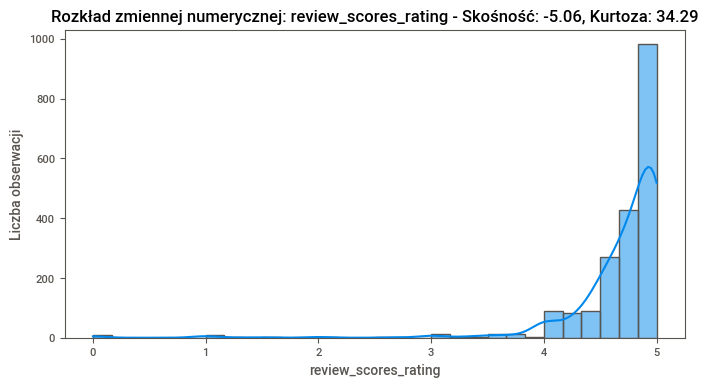

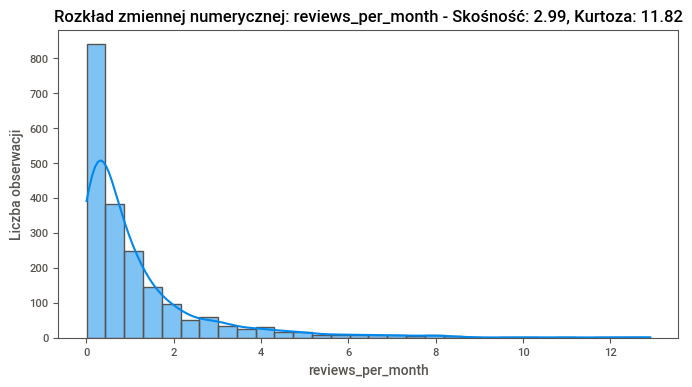

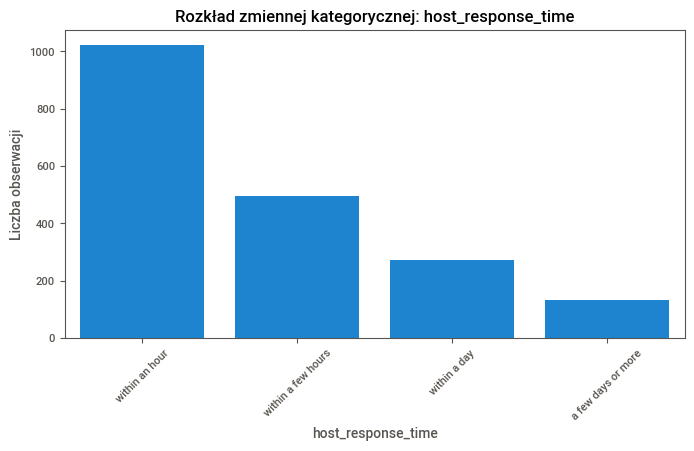

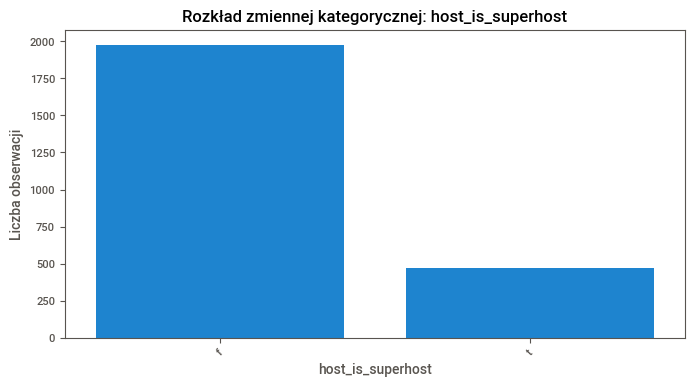

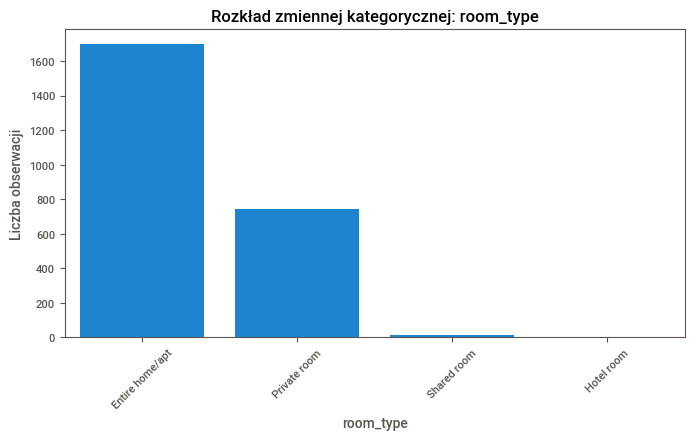

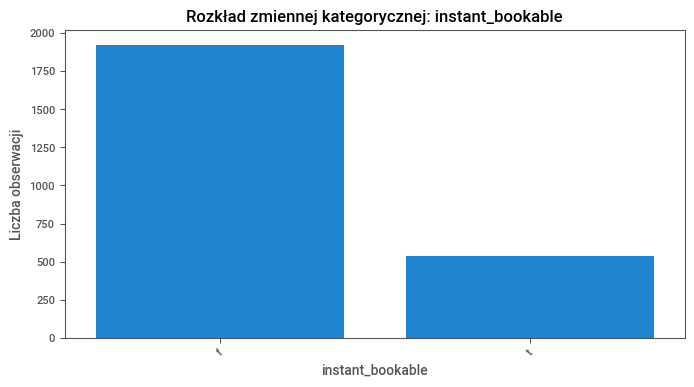

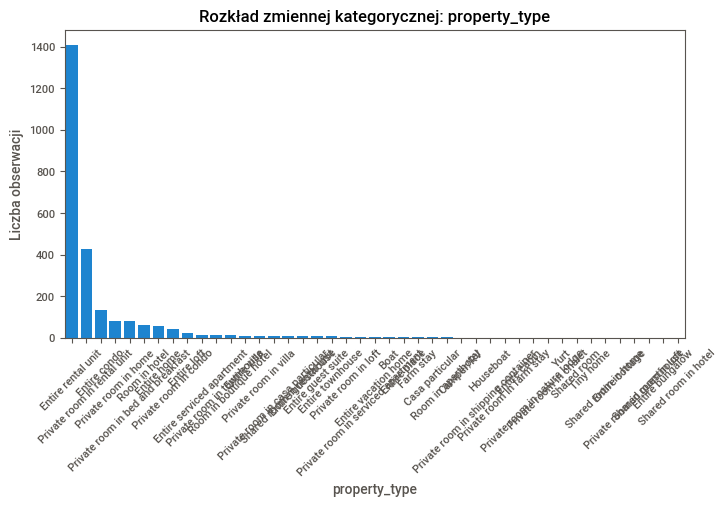

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Zaktualizowane zmienne numeryczne i kategoryczne
numerical_columns = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
categorical_columns = ['host_response_time', 'host_is_superhost', 'room_type', 'instant_bookable', 'property_type']

# Wizualizacja rozkładu zmiennych numerycznych oraz obliczenie ich skośności i kurtozy
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    non_null_series = df_raw[column].dropna()
    sns.histplot(non_null_series, bins=30, kde=True)
    plt.title(f'Rozkład zmiennej numerycznej: {column} - Skośność: {skew(non_null_series):.2f}, Kurtoza: {kurtosis(non_null_series):.2f}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.show()

# Wizualizacja rozkładu zmiennych kategorycznych
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    order = df_raw[column].value_counts().index
    non_null_data = df_raw[column].dropna()
    sns.countplot(x=non_null_data, order=order)
    plt.title(f'Rozkład zmiennej kategorycznej: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.xticks(rotation=45)
    plt.show()

### Czyszczenie danych

In [11]:
missing_data = df_raw.isnull().sum()
missing_data_percentage = (missing_data / len(df_raw)) * 100
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
print(columns_with_missing_data)

bathrooms                       100.000000
license                         100.000000
neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
host_neighbourhood               98.535395
neighbourhood                    51.790073
neighborhood_overview            51.790073
host_about                       50.569569
bedrooms                         34.255492
host_response_time               21.724980
host_response_rate               21.724980
review_scores_accuracy           18.510985
review_scores_communication      18.510985
review_scores_checkin            18.510985
review_scores_cleanliness        18.510985
review_scores_location           18.510985
review_scores_value              18.510985
last_review                      18.185517
review_scores_rating             18.185517
first_review                     18.185517
reviews_per_month                18.185517
host_location                    18.022783
host_acceptance_rate             13.059398
description

In [12]:
# Lista kolumn do uzupełnienia medianą
columns_to_fill_median = [
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "review_scores_rating",
    "reviews_per_month"
]

# Uzupełnienie brakujących danych medianą dla każdej z wybranych kolumn
for column in columns_to_fill_median:
    median_value = df_raw[column].median()
    df_raw[column].fillna(median_value, inplace=True)

In [13]:
# Lista kolumn do usunięcia
columns_to_drop = [
    "bathrooms", "license", "neighbourhood_group_cleansed",
    "calendar_updated", "host_neighbourhood"
]

# Usunięcie kolumn
df_raw.drop(columns=columns_to_drop, inplace=True)

In [14]:
# Uzupełnienie brakujących danych medianą dla 'bedrooms'
median_bedrooms = df_raw['bedrooms'].median()
df_raw['bedrooms'].fillna(median_bedrooms, inplace=True)

# Uzupełnienie brakujących danych modą dla 'host_response_time'
mode_host_response_time = df_raw['host_response_time'].mode()[0]
df_raw['host_response_time'].fillna(mode_host_response_time, inplace=True)

# Usunięcie kolumn z dużym procentem brakujących danych
columns_to_drop = ['neighborhood_overview', 'neighbourhood', 'host_about']
df_raw.drop(columns=columns_to_drop, inplace=True)

In [15]:
# Uzupełnienie brakujących danych modą dla 'host_response_rate' i 'host_acceptance_rate'
mode_host_response_rate = df_raw['host_response_rate'].mode()[0]
df_raw['host_response_rate'].fillna(mode_host_response_rate, inplace=True)

mode_host_acceptance_rate = df_raw['host_acceptance_rate'].mode()[0]
df_raw['host_acceptance_rate'].fillna(mode_host_acceptance_rate, inplace=True)

# Wypełnienie 'host_location' stałą wartością
df_raw['host_location'].fillna("Nieznane", inplace=True)

# Uzupełnienie brakujących danych medianą dla 'beds'
median_beds = df_raw['beds'].median()
df_raw['beds'].fillna(median_beds, inplace=True)

# Uzupełnienie 'host_is_superhost' modą
mode_host_is_superhost = df_raw['host_is_superhost'].mode()[0]
df_raw['host_is_superhost'].fillna(mode_host_is_superhost, inplace=True)

In [16]:
# Wypełnienie 'first_review' i 'last_review' specjalnym oznaczeniem
df_raw['first_review'].fillna("Brak recenzji", inplace=True)
df_raw['last_review'].fillna("Brak recenzji", inplace=True)

# Wypełnienie 'description' stałą wartością
df_raw['description'].fillna("Brak opisu", inplace=True)

#### Macierz Korelacji dla Zmiennych Numerycznych

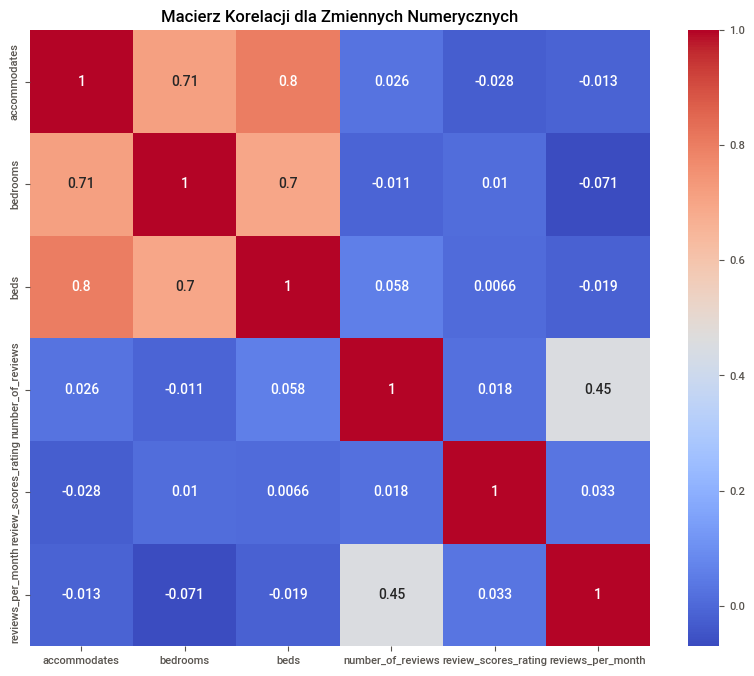

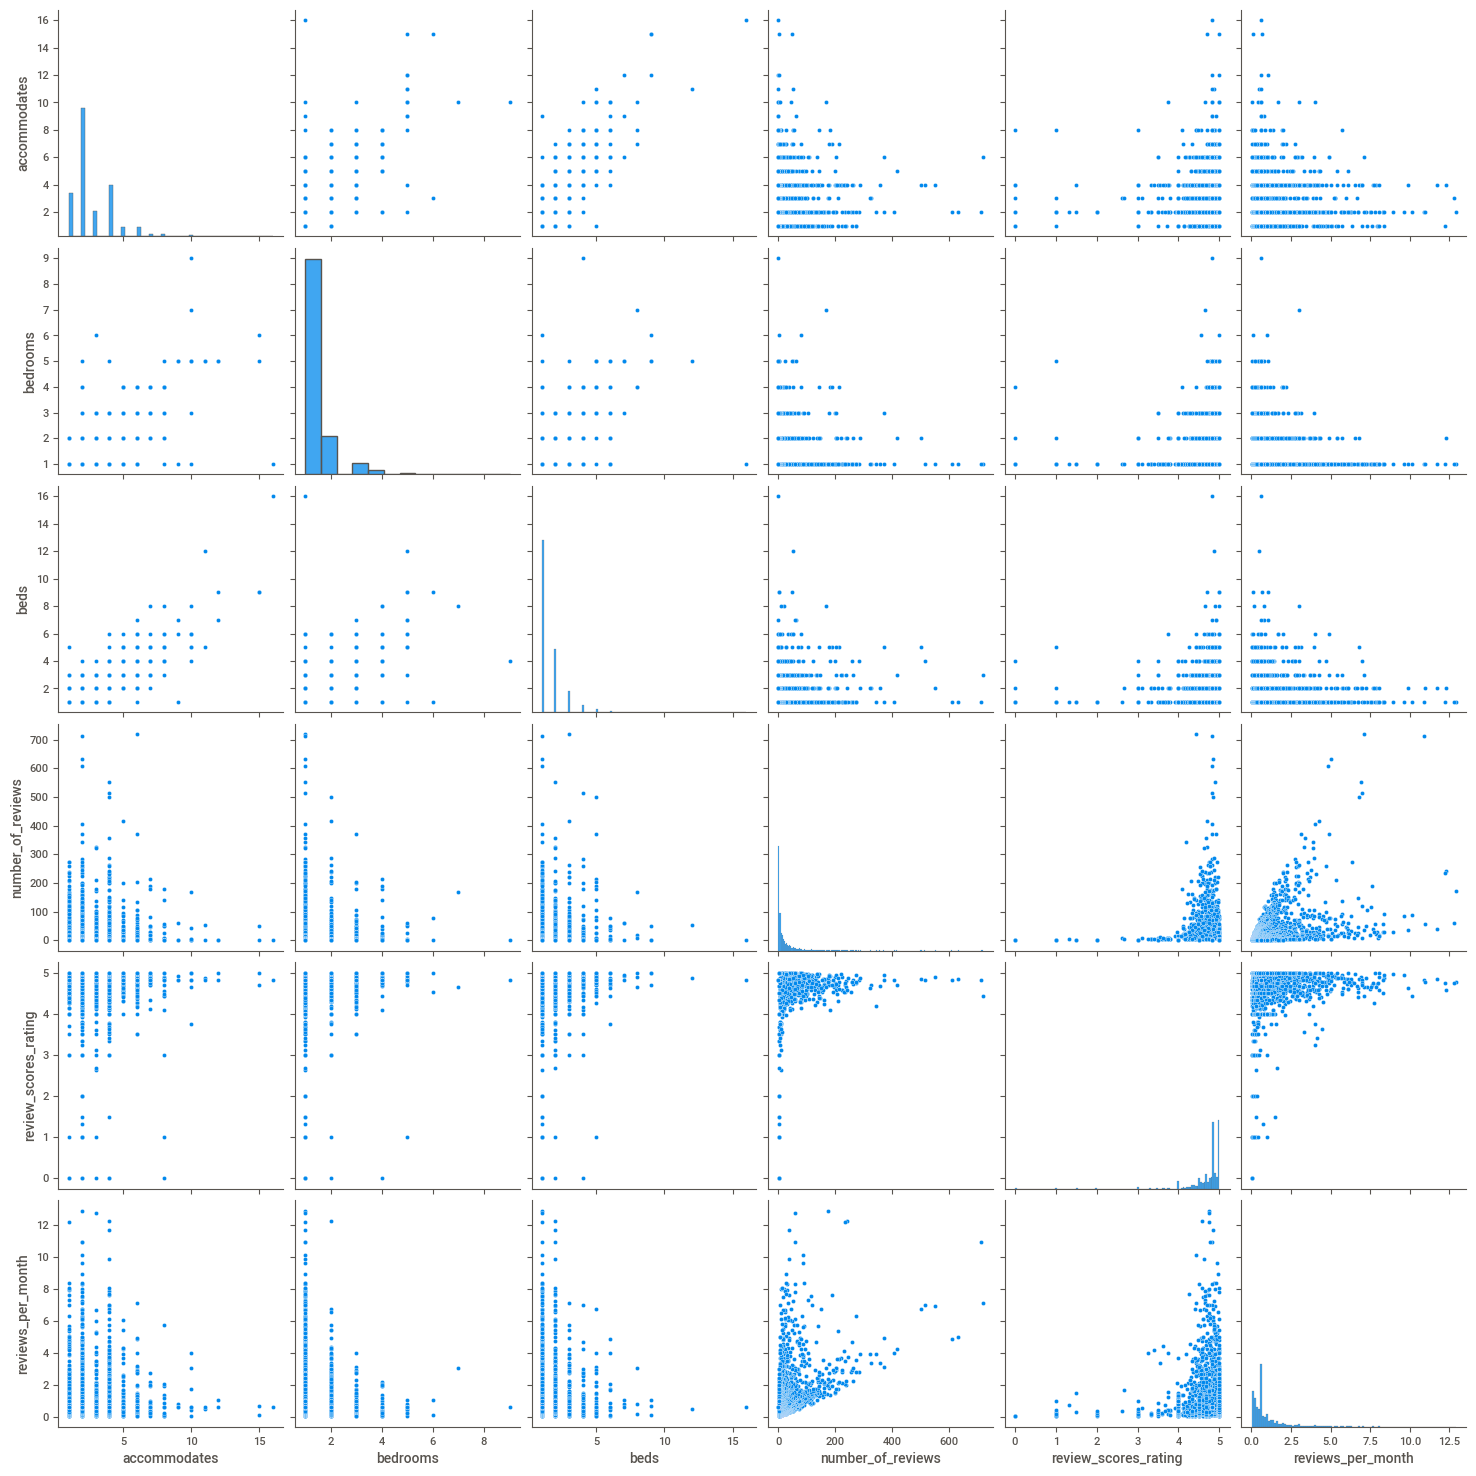

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczenie macierzy korelacji używając współczynnika Pearsona
numerical_columns = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
correlation_matrix = df_raw[numerical_columns].corr(method='pearson')

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Macierz Korelacji dla Zmiennych Numerycznych")
plt.show()

# Wykresy par zmiennych
sns.pairplot(df_raw[numerical_columns])
plt.show()

#### Współczynnik V Cramméra dla Zmiennych Kategorycznych

In [18]:
import pandas as pd
import scipy.stats as ss
import numpy as np

# Definicja funkcji Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Obliczenie i wyświetlenie współczynnika V Cramméra
categorical_columns = ['host_is_superhost', 'room_type', 'instant_bookable', 'property_type', 'host_response_time']
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramers_value = cramers_v(df_raw[col1], df_raw[col2])
            print(f"Cramér's V for {col1} and {col2}: {cramers_value}")

Cramér's V for host_is_superhost and room_type: 0.06163614274244896
Cramér's V for host_is_superhost and instant_bookable: 0.06526353265211703
Cramér's V for host_is_superhost and property_type: 0.10657272824873876
Cramér's V for host_is_superhost and host_response_time: 0.1455622268110689
Cramér's V for room_type and host_is_superhost: 0.06163614274244896
Cramér's V for room_type and instant_bookable: 0.007890476863760367
Cramér's V for room_type and property_type: 0.9171018072969738
Cramér's V for room_type and host_response_time: 0.0207463978171657
Cramér's V for instant_bookable and host_is_superhost: 0.06526353265211703
Cramér's V for instant_bookable and room_type: 0.007890476863760381
Cramér's V for instant_bookable and property_type: 0.1815352395528856
Cramér's V for instant_bookable and host_response_time: 0.30442120149340324
Cramér's V for property_type and host_is_superhost: 0.10657272824873876
Cramér's V for property_type and room_type: 0.9171018072969738
Cramér's V for pro

#### Model Liniowy dla Zależności między Zmienną Kategoryczną a Numeryczną

In [19]:
import statsmodels.api as sm

# Przykładowe dane: wpływ 'host_is_superhost' na 'number_of_reviews'
df_raw_encoded = pd.get_dummies(df_raw, columns=['host_is_superhost'])

# Przygotowanie danych do modelu
X = df_raw_encoded[['host_is_superhost_t']] # 't' dla superhostów
y = df_raw_encoded['number_of_reviews']

# Dodanie stałej do modelu
X = sm.add_constant(X)

# Tworzenie i dopasowanie modelu
model = sm.OLS(y, X).fit()

# Wyświetlenie podsumowania modelu
print(model.summary())
#Prob (F-statistic):  - jak najmniej

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.77e-29
Time:                        09:33:55   Log-Likelihood:                -13263.
No. Observations:                2458   AIC:                         2.653e+04
Df Residuals:                    2456   BIC:                         2.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.9415    

### Wyświetlenie na mapie ( dodatek )

In [20]:
!pip install folium

In [21]:
import folium
import random

# Próbkowanie losowego podzbioru danych, np. 100 mieszkań
sampled_data = df_raw.sample(n=100)

# Średnia lokalizacja Genewy do wycentrowania mapy
latitude_mean = sampled_data['latitude'].mean()
longitude_mean = sampled_data['longitude'].mean()

# Tworzenie mapy Genewy
map_geneva = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=13)

# Dodawanie markerów dla wybranych mieszkań
for _, row in sampled_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Mieszkanie: {row.get('name', 'Brak nazwy')}"
    ).add_to(map_geneva)

In [22]:
from folium.plugins import MarkerCluster

# Tworzenie mapy z klastrami
map_geneva = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=13)
marker_cluster = MarkerCluster().add_to(map_geneva)

# Dodawanie markerów do klastra
for _, row in df_raw.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Mieszkanie: {row.get('name', 'Brak nazwy')}"
    ).add_to(marker_cluster)

map_geneva

Output hidden; open in https://colab.research.google.com to view.